In [1]:
%load_ext sql
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.gridspec as gridspec
import scipy.stats as scipy

from numpy import random

from sklearn.metrics import accuracy_score

%matplotlib inline



In [4]:
%sql sqlite://

In [79]:
sql = sqlite3.connect(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\database.sqlite')

In [80]:
countries = pd.read_sql_query("SELECT * FROM country",sql)
matches = pd.read_sql_query("SELECT * from Match", sql)
leagues = pd.read_sql_query("SELECT * from League", sql)
teams = pd.read_sql_query("SELECT * from Team", sql)
    


In [15]:
countries.head(11)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [16]:
matches.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [81]:
leagues.rename({'name' : 'league_name'},axis=1 , inplace=True)

In [82]:
leagues

,id,country_id,league_name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [20]:
print(teams.tail())

        id  team_api_id  team_fifa_api_id      team_long_name team_short_name
294  49479        10190             898.0       FC St. Gallen             GAL
295  49837        10191            1715.0             FC Thun             THU
296  50201         9777             324.0         Servette FC             SER
297  50204         7730            1862.0  FC Lausanne-Sports             LAU
298  51606         7896               NaN              Lugano             LUG


# selecting countriesof our interest


First we will to select the countries of interest for our analysis. I am selecting England, Germany , Italy and Spain as these are the most popular and most watched leagues in football. These leagues are the most competitive league and it would give better understanding of the game

In [83]:
main_countries = ['England','Germany','Spain','Italy']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id')
seasons = matches.season.unique()
leagues

,id,name,country_id,league_name
0,1729,England,1729,England Premier League
1,7809,Germany,7809,Germany 1. Bundesliga
2,10257,Italy,10257,Italy Serie A
3,21518,Spain,21518,Spain LIGA BBVA


# Finding total goals

In [84]:
goals = matches[matches.league_id.isin(leagues['id'])]
goals = goals[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
goals["total_goals"] = goals['home_team_goal'] + goals['away_team_goal']
goals.dropna(inplace=True)
goals.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals
1728,1729,1729,10260,10261,1,1,2008/2009,2
1729,1730,1729,9825,8659,1,0,2008/2009,1
1730,1731,1729,8472,8650,0,1,2008/2009,1
1731,1732,1729,8654,8528,2,1,2008/2009,3
1732,1733,1729,10252,8456,4,2,2008/2009,6


we are adding results

In [85]:
def result(team):
    if team['home_team_goal'] == team['away_team_goal']:
        val = 0
    elif team['home_team_goal'] > team['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

goals["result"] = goals.apply(result,axis = 1)
goals.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
1728,1729,1729,10260,10261,1,1,2008/2009,2,0
1729,1730,1729,9825,8659,1,0,2008/2009,1,1
1730,1731,1729,8472,8650,0,1,2008/2009,1,-1
1731,1732,1729,8654,8528,2,1,2008/2009,3,1
1732,1733,1729,10252,8456,4,2,2008/2009,6,1


# Seperating to different leagues

The matches need to be separated and sorted by their leagues. A new dataframe for storing the separated leagues is created.

In [86]:
newdf = pd.merge(goals,leagues,left_on='league_id', right_on='id')
newdf = newdf.drop(['country_id','id_x', 'id_y' ],axis = 1)
english = newdf[newdf.name == "England"]
spanish = newdf[newdf.name == "Spain"]
german = newdf[newdf.name == "Germany"]
italy  = newdf[newdf.name== "Italy"]

display(english.head())
display(german.head())
display(spanish.tail())
display(italy.head())

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
2,1729,8472,8650,0,1,2008/2009,1,-1,England,England Premier League
3,1729,8654,8528,2,1,2008/2009,3,1,England,England Premier League
4,1729,10252,8456,4,2,2008/2009,6,1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
3040,7809,9823,9790,2,2,2008/2009,4,0,Germany,Germany 1. Bundesliga
3041,7809,8178,9789,2,3,2008/2009,5,-1,Germany,Germany 1. Bundesliga
3042,7809,10189,9904,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
3043,7809,8721,8722,2,1,2008/2009,3,1,Germany,Germany 1. Bundesliga
3044,7809,9810,8177,0,2,2008/2009,2,-1,Germany,Germany 1. Bundesliga


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
11540,21518,9906,10267,2,1,2015/2016,3,1,Spain,Spain LIGA BBVA
11541,21518,9864,9783,2,0,2015/2016,2,1,Spain,Spain LIGA BBVA
11542,21518,8315,9869,3,0,2015/2016,3,1,Spain,Spain LIGA BBVA
11543,21518,7878,8603,1,1,2015/2016,2,0,Spain,Spain LIGA BBVA
11544,21518,8370,8558,3,0,2015/2016,3,1,Spain,Spain LIGA BBVA


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
5488,10257,8524,8551,1,0,2008/2009,1,1,Italy,Italy Serie A
5489,10257,8529,8543,1,4,2008/2009,5,-1,Italy,Italy Serie A
5490,10257,8530,10233,1,0,2008/2009,1,1,Italy,Italy Serie A
5491,10257,8533,8690,2,1,2008/2009,3,1,Italy,Italy Serie A
5492,10257,8535,9885,1,1,2008/2009,2,0,Italy,Italy Serie A


# Splitting seasons in ascending order(year)

In [87]:
e  =  english.groupby('season')
g  =  german.groupby('season')
s  =  spanish.groupby('season')
i  =  italy.groupby('season')

display(e.head(5))
display(s.tail(5))
display(g.tail(5))
display(i.head(5))

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
2,1729,8472,8650,0,1,2008/2009,1,-1,England,England Premier League
3,1729,8654,8528,2,1,2008/2009,3,1,England,England Premier League
4,1729,10252,8456,4,2,2008/2009,6,1,England,England Premier League
380,1729,10260,8658,1,0,2009/2010,1,1,England,England Premier League
381,1729,8586,8650,2,1,2009/2010,3,1,England,England Premier League
382,1729,10252,8528,0,2,2009/2010,2,-1,England,England Premier League
383,1729,8668,9825,1,6,2009/2010,7,-1,England,England Premier League
384,1729,8602,8654,0,2,2009/2010,2,-1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
8880,21518,8603,9783,0,3,2008/2009,3,-1,Spain,Spain LIGA BBVA
8881,21518,8558,8371,1,0,2008/2009,1,1,Spain,Spain LIGA BBVA
8882,21518,9865,8633,1,1,2008/2009,2,0,Spain,Spain LIGA BBVA
8883,21518,9906,8661,2,0,2008/2009,2,1,Spain,Spain LIGA BBVA
8884,21518,10267,8696,2,4,2008/2009,6,-1,Spain,Spain LIGA BBVA
9260,21518,8315,9906,1,0,2009/2010,1,1,Spain,Spain LIGA BBVA
9261,21518,8661,8696,1,0,2009/2010,1,1,Spain,Spain LIGA BBVA
9262,21518,8371,8634,1,1,2009/2010,2,0,Spain,Spain LIGA BBVA
9263,21518,8394,9865,2,1,2009/2010,3,1,Spain,Spain LIGA BBVA
9264,21518,9864,10267,0,1,2009/2010,1,-1,Spain,Spain LIGA BBVA


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
3341,7809,10189,9912,0,0,2008/2009,0,0,Germany,Germany 1. Bundesliga
3342,7809,8398,9810,2,3,2008/2009,5,-1,Germany,Germany 1. Bundesliga
3343,7809,9904,8697,1,1,2008/2009,2,0,Germany,Germany 1. Bundesliga
3344,7809,9788,8295,1,0,2008/2009,1,1,Germany,Germany 1. Bundesliga
3345,7809,8226,9790,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
3647,7809,8721,9788,2,1,2009/2010,3,1,Germany,Germany 1. Bundesliga
3648,7809,8358,9823,1,2,2009/2010,3,-1,Germany,Germany 1. Bundesliga
3649,7809,9810,9904,2,1,2009/2010,3,1,Germany,Germany 1. Bundesliga
3650,7809,8722,9905,1,0,2009/2010,1,1,Germany,Germany 1. Bundesliga
3651,7809,8165,8177,3,0,2009/2010,3,1,Germany,Germany 1. Bundesliga


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
5488,10257,8524,8551,1,0,2008/2009,1,1,Italy,Italy Serie A
5489,10257,8529,8543,1,4,2008/2009,5,-1,Italy,Italy Serie A
5490,10257,8530,10233,1,0,2008/2009,1,1,Italy,Italy Serie A
5491,10257,8533,8690,2,1,2008/2009,3,1,Italy,Italy Serie A
5492,10257,8535,9885,1,1,2008/2009,2,0,Italy,Italy Serie A
5868,10257,9857,8535,1,1,2009/2010,2,0,Italy,Italy Serie A
5869,10257,8530,9882,1,2,2009/2010,3,-1,Italy,Italy Serie A
5870,10257,10233,8686,3,2,2009/2010,5,1,Italy,Italy Serie A
5871,10257,8636,9976,1,1,2009/2010,2,0,Italy,Italy Serie A
5872,10257,9885,8533,1,0,2009/2010,1,1,Italy,Italy Serie A


# Plotting total goals scored in each season

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

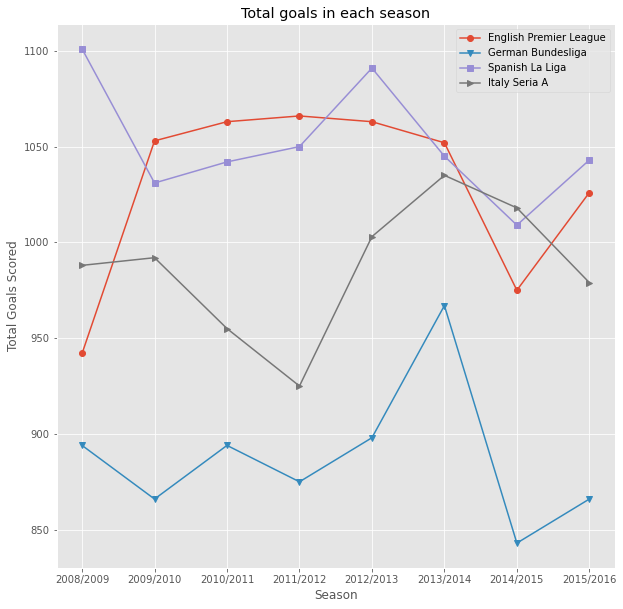

In [89]:
fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")

plt.xlabel("Season")
plt.xticks(range(len(seasons)),seasons)
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))

plt.plot(num_seasons,e.total_goals.sum().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,g.total_goals.sum().values,label = "German Bundesliga", marker = 'v')
plt.plot(num_seasons,s.total_goals.sum().values,label = "Spanish La Liga", marker = 's')
plt.plot(num_seasons,i.total_goals.sum().values,label = "Italy Seria A", marker = '>')
plt.legend()
seasons

Here we can see total goals scored is more in Spanish la liga,just above english premier league .In the case of Italian league ie seria A, the competion is more focused on defensive gameplay hence their overall goal contribution is low
Other leagues are more focused in Offensive gameplay(ie attacking game) so more goals involved

# Average goals per game in each season

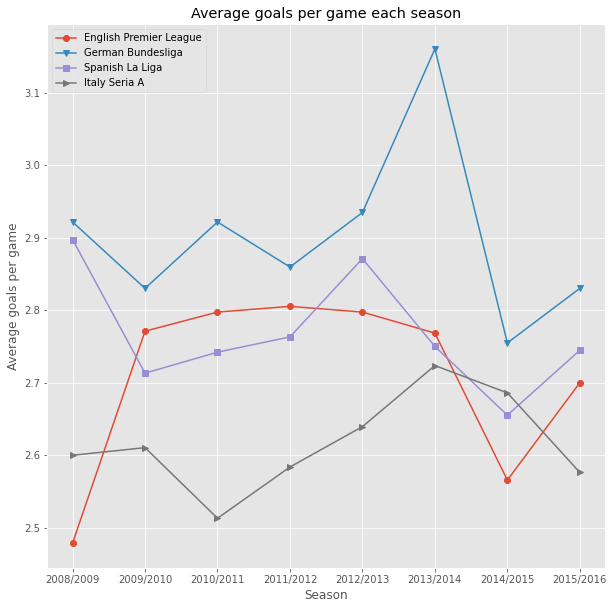

In [90]:
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")

plt.plot(num_seasons,e.total_goals.mean().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,g.total_goals.mean().values,label = "German Bundesliga", marker = 'v')
plt.plot(num_seasons,s.total_goals.mean().values,label = "Spanish La Liga", marker = 's')
plt.plot(num_seasons,i.total_goals.mean().values,label = "Italy Seria A", marker = '>')
plt.legend(loc = 'upper left')


The Bundesliga teams score way more on average in each game that the teams in other leagues. In the 2013/2014 season, Bundesliga teams scored more than 3 goals each game on an average (967 goals in 306 matches - 3.16 per match)

# Top Goal Scoring Team at Home

In [67]:
#Merging Home team and matches

matches_h_teams = pd.merge(newdf,teams,left_on='home_team_api_id', right_on='team_api_id')
matches_h_teams = matches_h_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_h_teams = matches_h_teams.rename(columns={'team_long_name':'home_team_long_name','name_y':'league_name','name':'country_name'})
matches_h_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,home_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Manchester United,MUN
1,1729,10260,8654,2,0,2008/2009,2,1,England,England Premier League,Manchester United,MUN
2,1729,10260,8667,4,3,2008/2009,7,1,England,England Premier League,Manchester United,MUN
3,1729,10260,10194,5,0,2008/2009,5,1,England,England Premier League,Manchester United,MUN
4,1729,10260,8472,1,0,2008/2009,1,1,England,England Premier League,Manchester United,MUN


Text(0.5, 0, 'Team name')

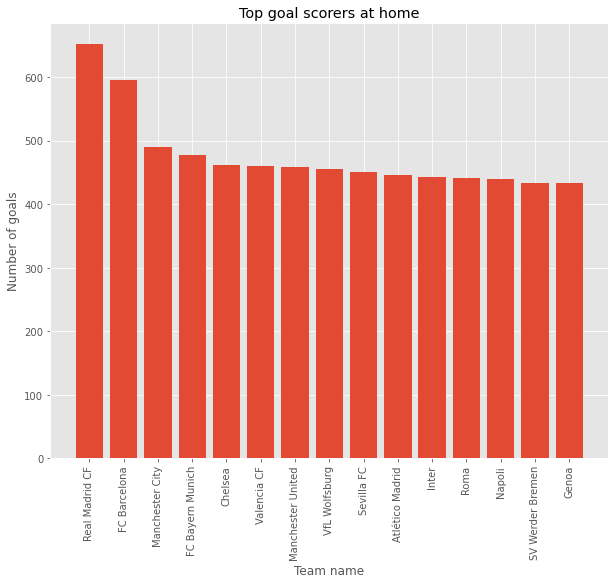

In [70]:
top_goal_scorers_home = matches_h_teams.groupby('home_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_home.head(15)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_home.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_home.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

# Top Goal Scoring Team at Away

In [71]:
#Merging Away team and matches

matches_a_teams = pd.merge(newdf,teams,left_on='away_team_api_id', right_on='team_api_id')
matches_a_teams = matches_a_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_a_teams = matches_a_teams.rename(columns={'team_long_name':'away_team_long_name','name_y':'league_name','name':'country_name'})
matches_a_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,away_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Newcastle United,NEW
1,1729,9879,10261,2,1,2008/2009,3,1,England,England Premier League,Newcastle United,NEW
2,1729,8455,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
3,1729,8549,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
4,1729,8462,10261,0,3,2008/2009,3,-1,England,England Premier League,Newcastle United,NEW


Text(0.5, 0, 'Team name')

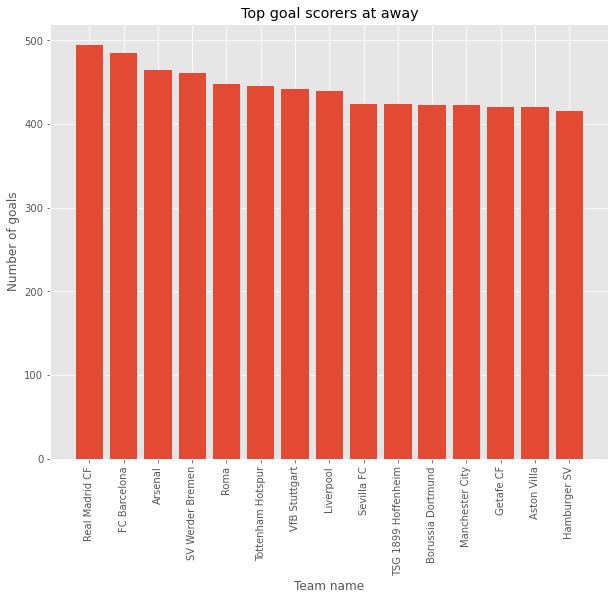

In [72]:
top_goal_scorers_away = matches_a_teams.groupby('away_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_away.head(15)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_away.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_away.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [110]:
#select fields
matches = matches[matches.league_id.isin(leagues.id)]
matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]
matches.dropna(inplace=True)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,3.4,4.33


# Probability of winning from Betting odds

Calculating entropy to determine predictability


Entropy is calculated to measure the disorder. The higher the entropy value the more unpredictable are the resuts of the matches.

In [111]:
from scipy.stats import entropy

def match_entropy(row):
    odds = [row['B365H'],row['B365D'],row['B365A']]
    #change odds to probability
    probs = [1/o for o in odds]
    #normalize to sum to 1
    norm = sum(probs)
    probs = [p/norm for p in probs]
    return entropy(probs)

#compute match entropy
matches['entropy'] = matches.apply(match_entropy,axis=1)

In [122]:
#compute mean entropy for every league in every season
entropy_means = matches.groupby(('season','league_id')).entropy.mean()
entropy_means = entropy_means.reset_index().pivot(index='season', columns='league_id', values='entropy')
entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]
entropy_means.head(10)


KeyError: ('season', 'league_id')

The English Premier League is more unpredicatable than the rest of the leagues. So we will try to predict the matches for this league..

In [135]:
display(english.head())
english.dropna(inplace=True)


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,league_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
2,1729,8472,8650,0,1,2008/2009,1,-1,England,England Premier League
3,1729,8654,8528,2,1,2008/2009,3,1,England,England Premier League
4,1729,10252,8456,4,2,2008/2009,6,1,England,England Premier League


<ipython-input-135-0f0ffc7bc56f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english.dropna(inplace=True)


In [136]:
english.shape

(3040, 10)

In [138]:
english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3039
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   league_id         3040 non-null   int64 
 1   home_team_api_id  3040 non-null   int64 
 2   away_team_api_id  3040 non-null   int64 
 3   home_team_goal    3040 non-null   int64 
 4   away_team_goal    3040 non-null   int64 
 5   season            3040 non-null   object
 6   total_goals       3040 non-null   int64 
 7   result            3040 non-null   int64 
 8   name              3040 non-null   object
 9   league_name       3040 non-null   object
dtypes: int64(7), object(3)
memory usage: 261.2+ KB


In [140]:
english.drop((['name','league_name']), axis=1,inplace=True)

D:\pythonanaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
english

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
0,1729,10260,10261,1,1,2008/2009,2,0
1,1729,9825,8659,1,0,2008/2009,1,1
2,1729,8472,8650,0,1,2008/2009,1,-1
3,1729,8654,8528,2,1,2008/2009,3,1
4,1729,10252,8456,4,2,2008/2009,6,1
...,...,...,...,...,...,...,...,...
3035,1729,8466,8197,2,2,2015/2016,4,0
3036,1729,10003,10194,0,1,2015/2016,1,-1
3037,1729,8586,8650,0,0,2015/2016,0,0
3038,1729,9817,9825,0,3,2015/2016,3,-1


# Total number of goals scored in Home matches

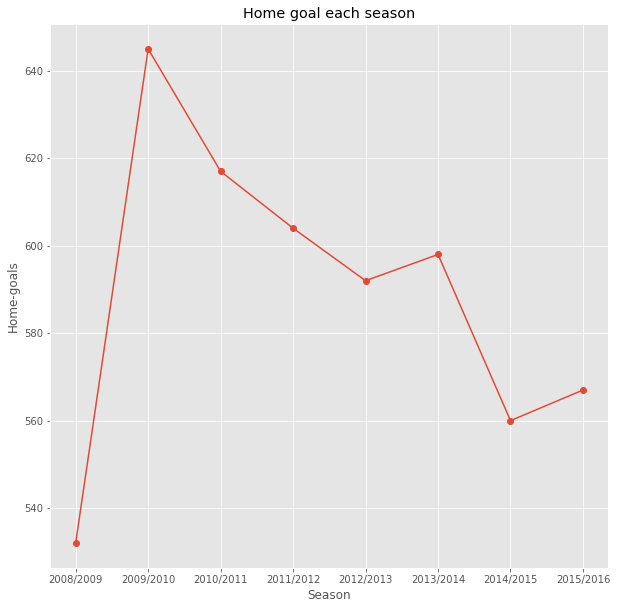

In [150]:
#Plotting home scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home goal each season')
plt.xlabel('Season')
plt.ylabel('Home-goals')
plt.plot(num_seasons,e.home_team_goal.sum().values,label = "English Premier League", marker = 'o')

# Total number of goals scored in Away matches

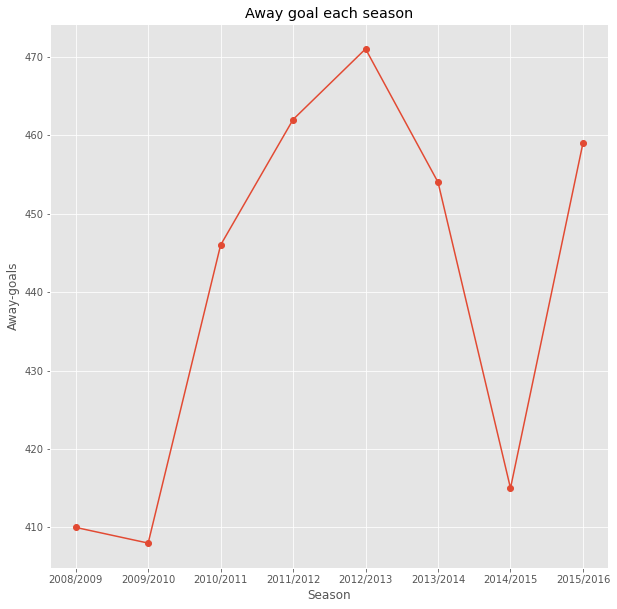

In [151]:
#Plotting away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Away goal each season')
plt.xlabel('Season')
plt.ylabel('Away-goals')
plt.plot(num_seasons,e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')

# Home goals to Away goals ratio

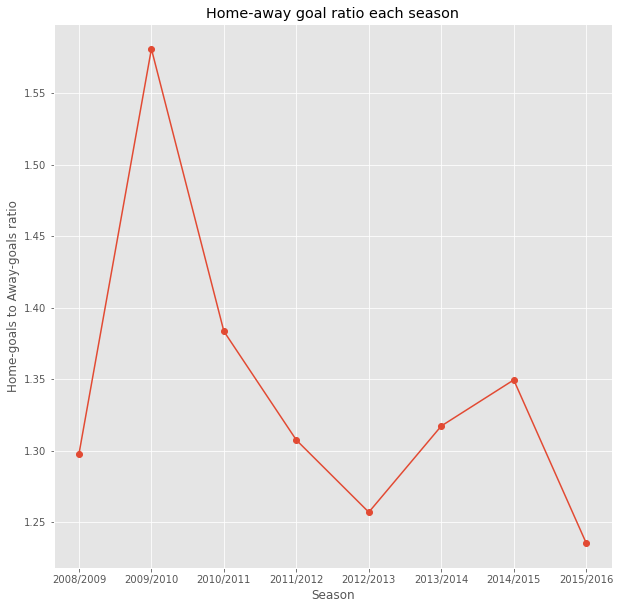

In [152]:

#Plotting home/away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home-away goal ratio each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(num_seasons,e.home_team_goal.sum().values / e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')

# Home wins vs Home Loss


array([1.57272727, 2.12087912, 1.98888889, 1.47413793, 1.56603774,
       1.45528455, 1.49565217, 1.35344828])

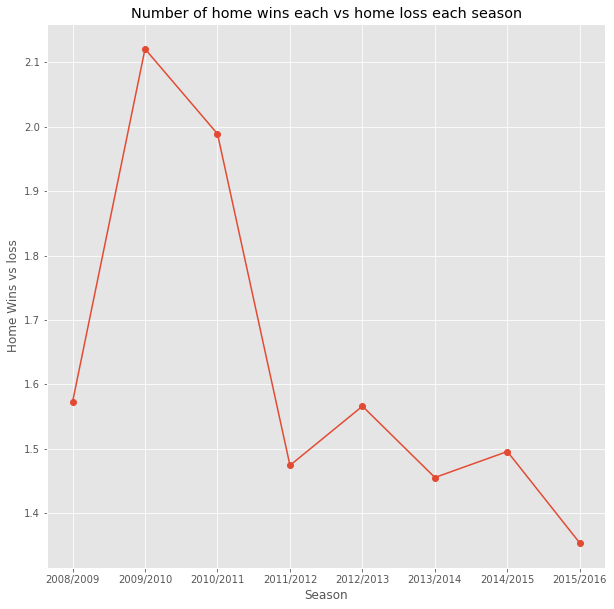

In [153]:

#Subsetting homewins vs homeloss from each of the leagues - ignoring draws.
e_hw = np.true_divide(english[english.result == 1].groupby('season').result.sum().values,english[english.result == -1].groupby('season').result.sum().values * -1)


#Plotting number of home wins vs home losses each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlim = (-20,20)
plt.ylim = (0,120)
plt.title("Number of home wins each vs home loss each season")
plt.xlabel("Season")
plt.ylabel("Home Wins vs loss")
plt.plot(num_seasons,e_hw,label = "English Premier League", marker = 'o')
display(e_hw)

 home advantage in premier league is decreasing every season. Initially home matches were very good factor to determine the winner of the match. Now the matches have become very competitive and we cannot predict the match outcome just on the home advantage.

# Downloading additional content as there are alot of data missing which is much required for additional analysis

In [170]:
raw_data_1 = pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data1.csv')
raw_data_2 = pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data2.csv')
raw_data_3 = pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data3.csv')
raw_data_4 = pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data4.csv')
raw_data_5= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data5.csv')
raw_data_6= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data6.csv')
raw_data_7= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data7.csv')
raw_data_8= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data8.csv')
raw_data_9= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data9.csv')
raw_data_10= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data10.csv')
raw_data_11= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data11.csv')
raw_data_12= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data12.csv')
raw_data_13= pd.read_csv(r'E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\data13.csv')



Selecting the required features and putting it in the dataframe


In [172]:
raw_data_1 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_2 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_3 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_4 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_5 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_6 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_7 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_8 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_9 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_10 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_11 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_12 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
raw_data_13 =raw_data_1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]

Concatinating the data on one dataframe

In [173]:


playing_stat = pd.concat([raw_data_1,raw_data_2,raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13],ignore_index=True)

In [174]:
playing_stat.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Arsenal,West Brom,1,0,H,1,0,H,24,5,14,4,11,8,7,5,0,0,0,0
1,Bolton,Stoke,3,1,H,3,0,H,14,8,8,2,13,12,4,3,1,2,0,0
2,Everton,Blackburn,2,3,A,1,1,D,10,15,5,11,11,9,3,5,2,2,0,0
3,Hull,Fulham,2,1,H,1,1,D,11,12,6,6,10,9,5,6,3,0,0,0
4,Middlesbrough,Tottenham,2,1,H,0,0,D,14,8,10,5,11,12,7,9,1,2,0,0


FTHG - Full Time Home Goal--
FTAG - Half Time Away Goal--
FTR - Full Time Result--
HTHG - Half Time Home Goal--
HTAG - Half Time Away Goal--
HTR - Half Time Result--
HS - Home Shots--
AS - Away Shots--
HST - Home Shots on Target--
AST - Away Shots on Target--
HF - Home Team Foul--
AF - Away Team Foul--
HC - Home Team Corner--
AC - Away Team Corner--
HY - Home Team Yellow Card--
Ay - Away Team Yellow Card--
HR - Home Team Red Card--
Ar - Away Team Red Card--


In [179]:
# Creating csv file from the merged dataframe

playing_stat.to_csv(r"E:\CAPSTONE PROJECT-MATCH PREDICTION\football data additional\Merged_dataset.csv")


Created a csv file from the data for future analysis

In [6]:
df = pd.read_csv(r"E:\CAPSTONE PROJECT-1 & 2\MATCH PREDICTION FOOTBALL\football data additional\Merged_dataset.csv")

In [7]:
df

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,Arsenal,West Brom,1,0,H,1,0,H,24,...,14,4,11,8,7,5,0,0,0,0
1,1,Bolton,Stoke,3,1,H,3,0,H,14,...,8,2,13,12,4,3,1,2,0,0
2,2,Everton,Blackburn,2,3,A,1,1,D,10,...,5,11,11,9,3,5,2,2,0,0
3,3,Hull,Fulham,2,1,H,1,1,D,11,...,6,6,10,9,5,6,3,0,0,0
4,4,Middlesbrough,Tottenham,2,1,H,0,0,D,14,...,10,5,11,12,7,9,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,4935,Liverpool,Tottenham,3,1,H,1,0,H,20,...,9,4,14,4,9,2,0,1,0,0
4936,4936,Man City,Bolton,1,0,H,1,0,H,20,...,12,4,8,10,15,9,0,0,0,0
4937,4937,Sunderland,Chelsea,2,3,A,0,0,D,8,...,7,9,8,7,6,7,1,1,0,0
4938,4938,West Ham,Middlesbrough,2,1,H,1,0,H,14,...,8,6,14,10,4,5,0,1,0,0


In [8]:
df.drop((['Unnamed: 0']),axis=1,inplace=True)

In [9]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Arsenal,West Brom,1,0,H,1,0,H,24,5,14,4,11,8,7,5,0,0,0,0
1,Bolton,Stoke,3,1,H,3,0,H,14,8,8,2,13,12,4,3,1,2,0,0
2,Everton,Blackburn,2,3,A,1,1,D,10,15,5,11,11,9,3,5,2,2,0,0
3,Hull,Fulham,2,1,H,1,1,D,11,12,6,6,10,9,5,6,3,0,0,0
4,Middlesbrough,Tottenham,2,1,H,0,0,D,14,8,10,5,11,12,7,9,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,Liverpool,Tottenham,3,1,H,1,0,H,20,8,9,4,14,4,9,2,0,1,0,0
4936,Man City,Bolton,1,0,H,1,0,H,20,8,12,4,8,10,15,9,0,0,0,0
4937,Sunderland,Chelsea,2,3,A,0,0,D,8,14,7,9,8,7,6,7,1,1,0,0
4938,West Ham,Middlesbrough,2,1,H,1,0,H,14,17,8,6,14,10,4,5,0,1,0,0


In [11]:

#Extract necessary features from the data file
dff=df.iloc[:,:30]
#half time home goal(hthg), half time away goal(htag), Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
dff = dff[['HTHG','HTAG','HST','AST','HC','AC','FTR']]
dff.head()


,HTHG,HTAG,HST,AST,HC,AC,FTR
0,1,0,14,4,7,5,H
1,3,0,8,2,4,3,H
2,1,1,5,11,3,5,A
3,1,1,6,6,5,6,H
4,0,0,10,5,7,9,H


In [12]:
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [13]:
dff["Result"] = dff.apply(lambda row: transformResult(row),axis=1)
dff.head(10)

,HTHG,HTAG,HST,AST,HC,AC,FTR,Result
0,1,0,14,4,7,5,H,1
1,3,0,8,2,4,3,H,1
2,1,1,5,11,3,5,A,-1
3,1,1,6,6,5,6,H,1
4,0,0,10,5,7,9,H,1
5,0,0,3,8,1,8,A,-1
6,2,0,8,9,6,10,H,1
7,0,0,10,8,7,8,H,1
8,3,0,11,8,8,3,H,1
9,1,1,12,4,6,6,D,0


In [14]:
dff.drop((['FTR']),axis=1,inplace=True)

CREATING TRAINING AND TESTING DATA

In [15]:
x = dff.iloc[:, :-1].values
y = dff.iloc[:, -1].values

In [16]:
x

array([[ 1,  0, 14,  4,  7,  5],
       [ 3,  0,  8,  2,  4,  3],
       [ 1,  1,  5, 11,  3,  5],
       ...,
       [ 0,  0,  7,  9,  6,  7],
       [ 1,  0,  8,  6,  4,  5],
       [ 1,  0, 10,  3,  8,  2]], dtype=int64)

In [17]:
y

array([ 1,  1, -1, ..., -1,  1,  1], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
print(x_train)

[[-0.76860976 -0.65986378  0.4226149   1.11873023 -0.07841082  1.1513641 ]
 [ 1.70980553 -0.65986378  2.07632539 -0.89351777  0.23464101 -1.42771932]
 [-0.76860976 -0.65986378 -0.95547717  1.4541049  -0.7045145   0.41448312]
 ...
 [-0.76860976  2.37150052 -0.67985876 -0.22276844  0.54769285 -1.79615981]
 [-0.76860976 -0.65986378 -0.40424034 -0.22276844 -0.7045145   0.41448312]
 [-0.76860976 -0.65986378  0.4226149   0.4479809   0.54769285  0.04604263]]


# IMPLEMENTING ML MODELS

# 1) LOGISITIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1  1]
 [ 1  1]
 [ 1  1]
 ...
 [ 0 -1]
 [ 1  0]
 [-1 -1]]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[254  67  51]
 [ 89 113 108]
 [ 47  58 448]]


0.659919028340081

# 2) SUPPORT VECTOR MACHINE

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1  1]
 [ 1  1]
 [ 1  1]
 ...
 [ 1 -1]
 [ 1  0]
 [-1 -1]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[248  68  56]
 [ 90 113 107]
 [ 54  60 439]]


0.6477732793522267

# 3) NAIVE BAYES

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[248  68  56]
 [ 90 113 107]
 [ 54  60 439]]


0.6477732793522267

So far the logistic regression gives the best results but we need to do one more method called XGBOOST..The XGBOOST gives me an accuracy of 81% which is much much higher than the all models..
I will implement my xgboost method in google colab as some process errors is happening while importing in Jupyter notebook

# conclusion

The betting accuracy of bookies was around 53% while the model created using XGBOOST gave an accuracy of 81.4% . The accuracy can further increase if we could add more features like team form or player form and other shot related attributes